In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

In [3]:
from sklearn import linear_model

# Open data

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/981/981Final/981ss2onc500regcdFF40sMpsfkfint799Smith0_4_60TS.mat


In [5]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(23266, 799)

In [6]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie2/981/981Final/981ss2onc500regcdFF40sMpsfkfint799Smith0_4_60IC.nii


In [7]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(181, 88, 9, 799)

In [8]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/home/sophie/Desktop/981ss2TimeFluoOn.mat


In [9]:
Ua=sio.loadmat(filename)
Time_fluo=Ua['TimeFluoOn']
Time_fluo.shape

(1, 12272)

In [9]:
Time_fluoICA=Time_fluo[:,501:6346]

In [10]:
Time_fluoICA.shape

(1, 5845)

In [10]:
Time_fluoICA=np.array(range(23266))*0.01

Z-score

In [11]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [12]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [277]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [58]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/981/981Final/981Xk.mat


In [59]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [60]:
Xk.shape

(23266, 6)

# Open Masks

In [17]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/home/sophie/Downloads/JFRC981Transformedfullpsftrimmed.nii


In [18]:
filenameM='/home/sophie/Downloads/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [19]:
Dmaps.shape

(181, 88, 9, 799)

In [20]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [21]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

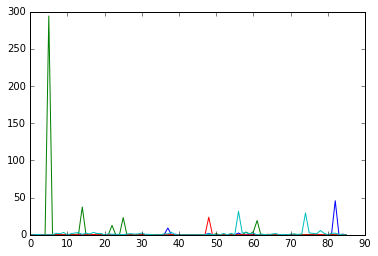

In [22]:
plt.plot(M[1,:])
plt.plot(M[100,:])
plt.plot(M[200,:])
plt.plot(M[298,:])

In [25]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(75) if Num[l]==I]
    CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [26]:
Time_fluoICA.shape

(23266,)

In [27]:
DT.shape

(23266, 799)

AME_R
5
AME_R
PVLP_R
EPA_R
PVLP_L
39
AME_R
PVLP_R
90
AME_R
110
AME_R
PLP_R
163
AME_R
536
AME_R
BU_R
562
AME_R
CRE_L
AVLP_L
668
AME_R
785
accessory medulla


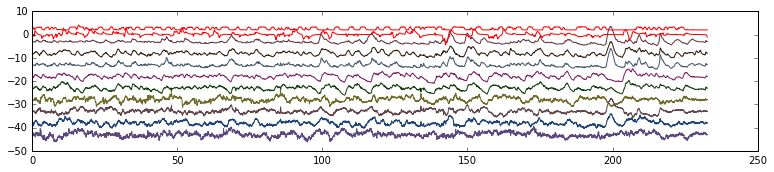

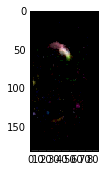

LO_R
LOP_R
57
LO_R
LOP_R
105
LO_R
115
LO_R
175
LO_R
LOP_R
177
LO_R
ICL_R
AVLP_R
PLP_R
181
LO_R
LOP_R
182
LO_R
NO
239
LO_R
LOP_R
GA_R
249
LO_R
LOP_R
251
LO_R
LOP_R
279
LO_R
ME_R
322
LO_R
352
LO_R
LOP_R
ME_R
PLP_R
354
LO_R
356
LO_R
378
LO_R
LOP_R
398
LO_R
LOP_R
404
LO_R
GA_R
435
LO_R
LOP_R
IVLP_R
IPS_R
451
LO_R
LOP_R
463
LO_R
LOP_R
ME_R
497
LO_R
508
LO_R
SAD
LOP_R
IPS_R
530
LO_R
LOP_R
546
LO_R
IPS_R
552
LO_R
ME_R
577
LO_R
VES_R
LOP_R
593
LO_R
LOP_R
ME_R
636
lobula


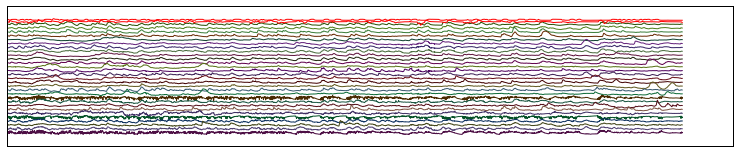

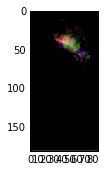

NO
PB
572
NO
576
nodulus


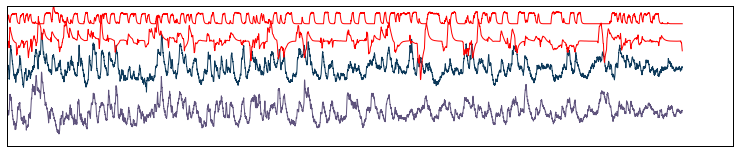

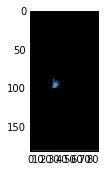

BU_R
LOP_R
BU_L
101
BU_R
MB_VL_R
GA_R
AME_L
382
BU_R
ME_L
547
BU_R
575
BU_R
ME_R
578
BU_R
588
BU_R
652
bulb


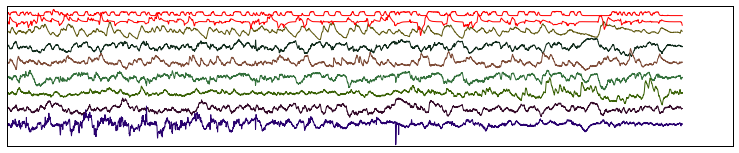

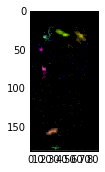

PB
100
PB
ATL_R
206
PB
ATL_R
ATL_L
242
PB
FB
600
protocerebral bridge


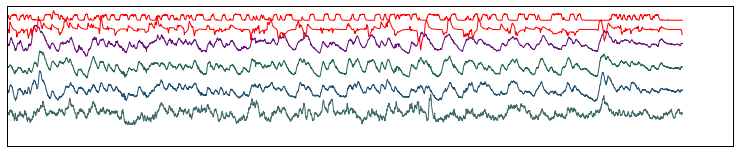

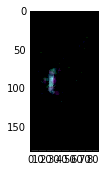

LH_R
208
LH_R
411
LH_R
526
LH_R
642
LH_R
MB_PED_R
AL_R
MB_CA_R
671
lateral horn


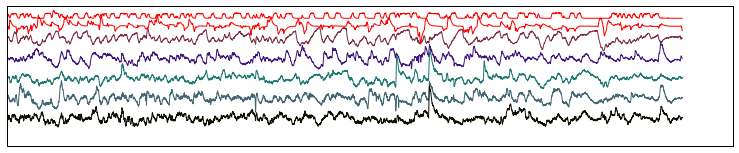

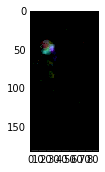

SAD
FLA_R
GNG
189
SAD
CAN_R
GNG
PRW
271
saddle


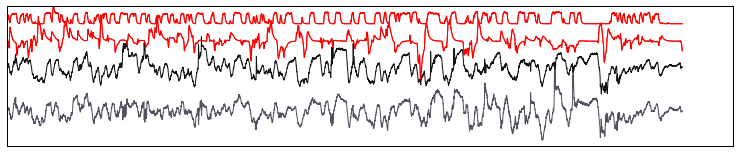

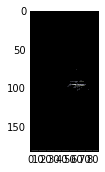

CAN_R
LOP_R
AOTU_R
EPA_L
260
CAN_R
285
AME_R
CAN_R
FLA_R
GA_R
396
CAN_R
412
CAN_R
SCL_R
EPA_R
531
CAN_R
SIP_R
SMP_R
GA_R
541
CAN_R
EPA_R
BU_L
542
SAD
CAN_R
FLA_R
GNG
599
CAN_R
GOR_R
602
CAN_R
ME_R
644
CAN_R
PVLP_L
782
cantle


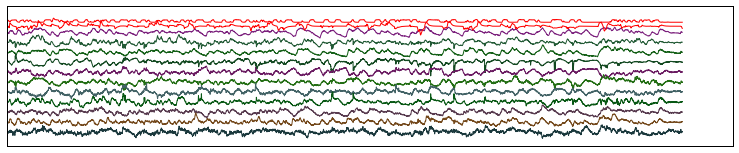

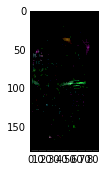

AMMC_R
IVLP_R
0
SAD
AMMC_R
16
SAD
AMMC_R
30
SAD
AMMC_R
76
antennal mechanosensory and motor center


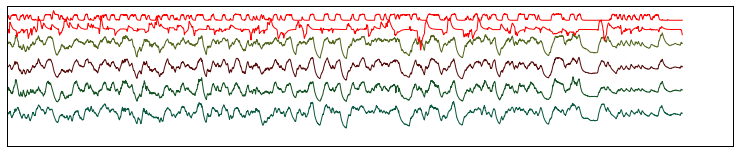

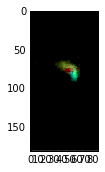

ICL_R
SPS_R
160
inferior clamp


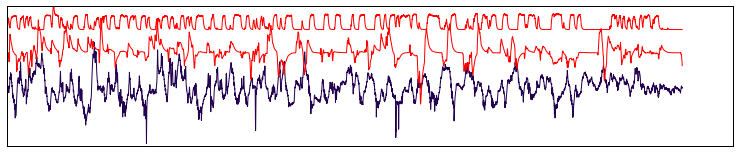

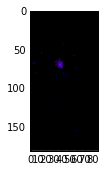

IB_R
35
IB_R
EPA_R
IB_L
192
inferior bridge


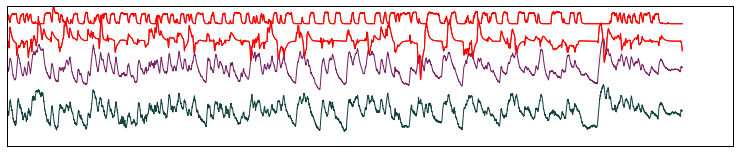

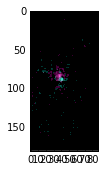

ATL_R
46
NO
IB_R
ATL_R
351
antler


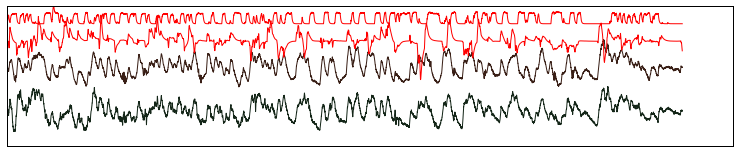

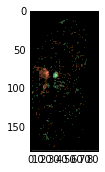

CRE_R
MB_VL_R
SIP_R
25
MB_VL_R
SIP_R
148
MB_VL_R
308
vertical lobe of adult mushroom body


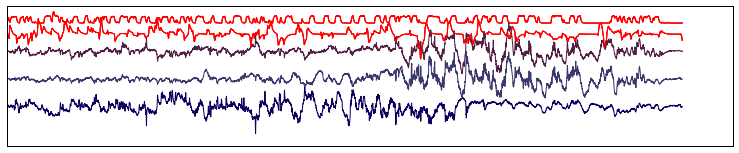

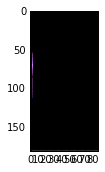

CRE_R
MB_ML_R
SMP_R
465
CRE_R
MB_ML_R
608
MB_VL_R
MB_ML_R
670
CRE_R
MB_ML_R
FLA_R
746
medial lobe of adult mushroom body


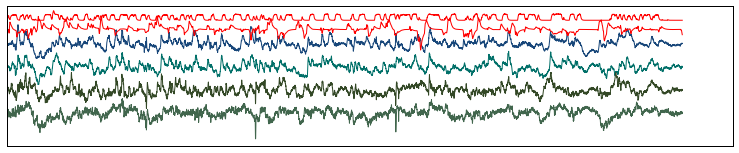

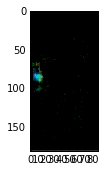

CAN_R
FLA_R
CAN_L
165
FLA_R
PRW
EPA_L
209
flange


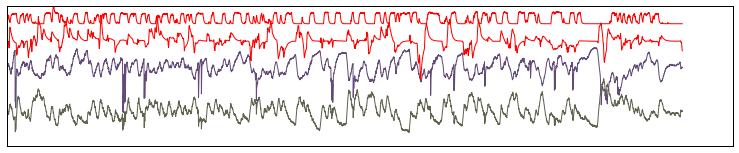

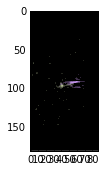

LOP_R
62
LO_R
LOP_R
64
LOP_R
65
LOP_R
ME_R
73
LO_R
LOP_R
145
AME_R
LO_R
LOP_R
ME_R
149
LOP_R
CAN_L
154
LOP_R
ME_R
173
LO_R
LOP_R
188
LO_R
LOP_R
ME_R
197
LOP_R
ME_R
214
AME_R
LO_R
LOP_R
219
LOP_R
ME_R
238
LOP_R
256
LOP_R
AME_L
304
LOP_R
ME_R
383
AME_R
LOP_R
ME_R
AOTU_L
448
LOP_R
ME_R
CAN_L
456
LO_R
LOP_R
477
LOP_R
631
LO_R
LOP_R
EPA_L
647
LO_R
AMMC_R
LOP_R
IPS_R
650
LOP_R
EPA_R
CAN_L
725
lobula plate


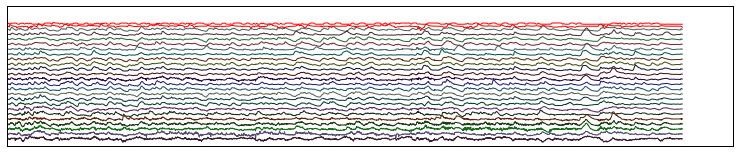

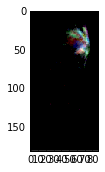

EB
FB
570
NO
EB
FB
598
EB
632
ellipsoid body


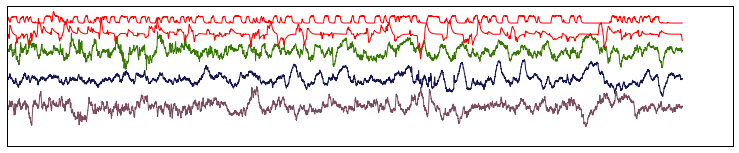

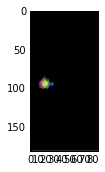

LAL_R
VES_R
AL_R
EPA_R
13
AL_R
29
LAL_R
AL_R
GA_R
97
adult antennal lobe


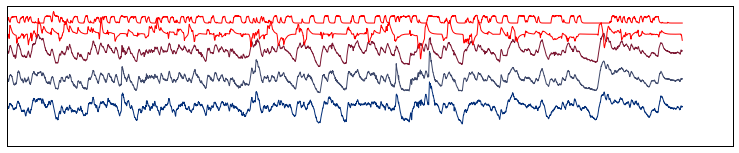

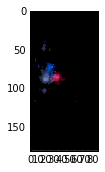

LOP_R
ME_R
58
LOP_R
ME_R
75
LOP_R
ME_R
77
LOP_R
ME_R
102
BU_R
LOP_R
ME_R
108
LO_R
ME_R
138
LOP_R
ME_R
146
LOP_R
ME_R
153
LOP_R
ME_R
162
LOP_R
ME_R
166
LOP_R
ME_R
167
LOP_R
ME_R
168
ME_R
170
LO_R
ME_R
GA_R
186
LOP_R
ME_R
203
LOP_R
ME_R
210
ME_R
222
ME_R
224
LO_R
ME_R
233
BU_R
LOP_R
ME_R
241
LO_R
ME_R
261
LOP_R
ME_R
EPA_R
264
LOP_R
ME_R
269
LO_R
ME_R
295
LO_R
ME_R
303
LOP_R
ME_R
310
ME_R
313
LOP_R
ME_R
329
ME_R
339
LOP_R
ME_R
341
ME_R
347
ME_R
355
ME_R
361
LO_R
ME_R
365
LO_R
LOP_R
ME_R
368
LOP_R
ME_R
370
ME_R
375
LO_R
LOP_R
ME_R
386
ME_R
395
LO_R
ME_R
402
ME_R
MB_VL_L
437
AME_R
LO_R
LOP_R
ME_R
449
LO_R
ME_R
460
ME_R
472
AME_R
ME_R
481
AME_R
MB_VL_R
ME_R
CAN_L
503
LO_R
ME_R
AME_L
513
ME_R
516
ME_R
518
ME_R
533
ME_R
539
LO_R
LOP_R
ME_R
563
LO_R
ME_R
567
LOP_R
ME_R
581
LO_R
ME_R
587
ME_R
IVLP_R
MB_PED_L
GOR_L
590
LOP_R
ME_R
EPA_L
610
ME_R
619
LO_R
ME_R
643
LO_R
LOP_R
ME_R
655
LOP_R
ME_R
682
MB_ML_R
ME_R
CAN_L
721
medulla


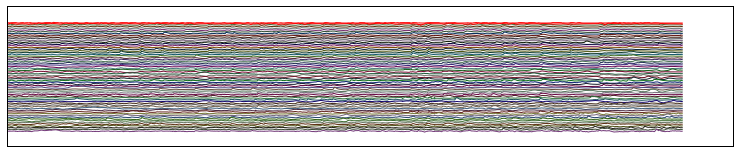

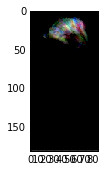

NO
PB
FB
250
ATL_R
FB
272
NO
PB
IB_R
FB
710
fan-shaped body


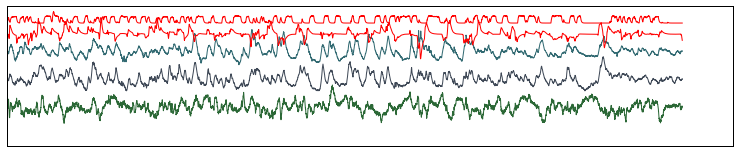

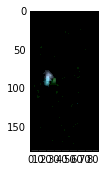

SLP_R
MB_CA_R
SCL_R
500
SLP_R
SIP_R
601
SLP_R
MB_CA_R
GOR_L
EPA_L
615
superior lateral protocerebrum


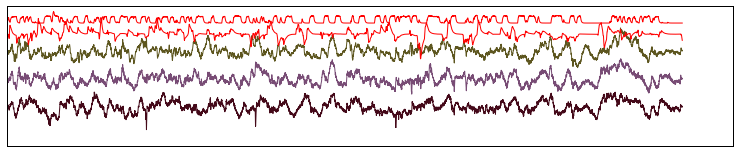

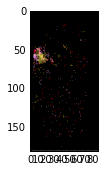

SMP_R
176
EB
SMP_R
MB_ML_L
SMP_L
453
SIP_R
SMP_R
CAN_L
584
ATL_R
SMP_R
687
superior medial protocerebrum


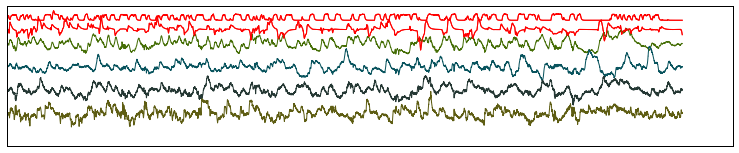

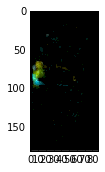

AVLP_R
PVLP_R
33
AVLP_R
55
AMMC_R
AVLP_R
91
BU_R
ATL_R
AVLP_R
494
anterior ventrolateral protocerebrum


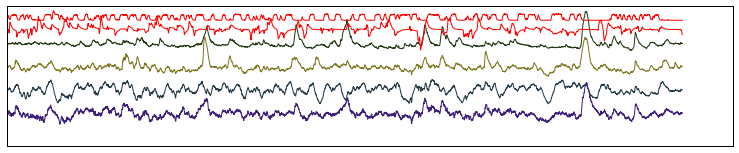

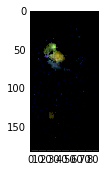

PVLP_R
PLP_R
47
AVLP_R
PVLP_R
PLP_R
50
AVLP_R
PVLP_R
126
AVLP_R
PVLP_R
PLP_R
204
PVLP_R
PLP_R
254
PVLP_R
PLP_R
GOR_R
427
posterior ventrolateral protocerebrum


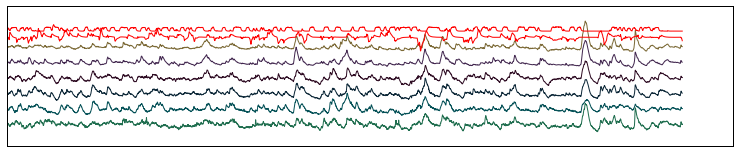

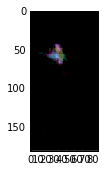

IVLP_R
53
AMMC_R
IVLP_R
78
wedge


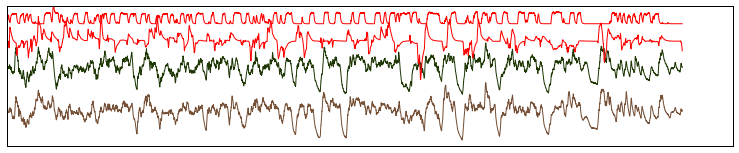

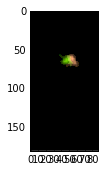

AME_R
PLP_R
45
AME_R
AVLP_R
PVLP_R
PLP_R
85
PVLP_R
PLP_R
161
PLP_R
276
PLP_R
432
posterior lateral protocerebrum


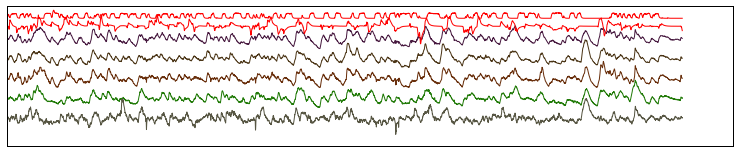

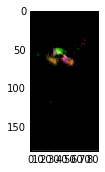

AOTU_R
307
anterior optic tubercle


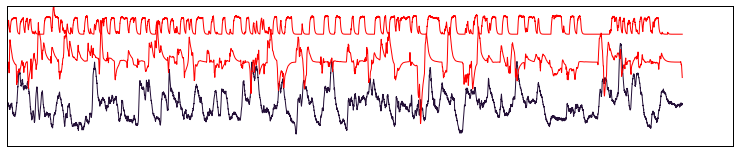

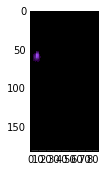

LH_R
PLP_R
MB_CA_R
SCL_R
324
MB_CA_R
SCL_R
688
calyx of adult mushroom body


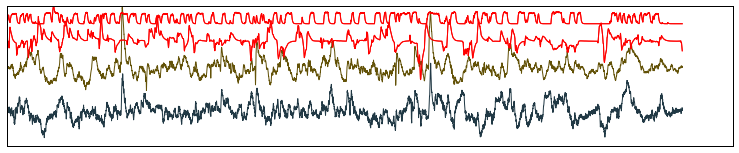

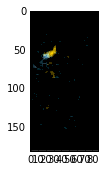

SPS_R
3
VES_R
PLP_R
SPS_R
34
AOTU_R
SPS_R
140
AMMC_R
SPS_R
IPS_R
AMMC_L
621
superior posterior slope


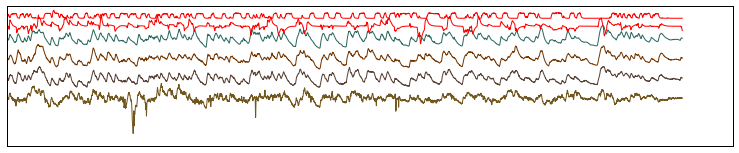

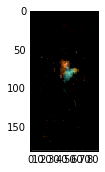

IPS_R
4
IVLP_R
SPS_R
IPS_R
EPA_R
28
IPS_R
41
IPS_R
89
IPS_R
GNG
270
LO_R
IPS_R
379
IPS_R
545
IPS_R
596
LO_R
SAD
LOP_R
IPS_R
628
LO_R
AMMC_R
LOP_R
IPS_R
646
inferior posterior slope


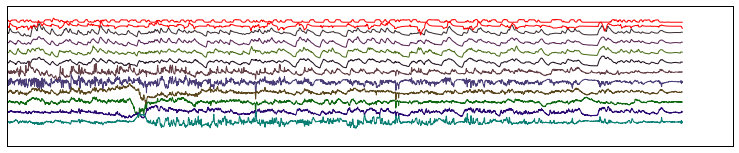

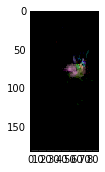

EPA_R
EPA_L
328
NO
VES_R
FLA_R
EPA_R
657
epaulette


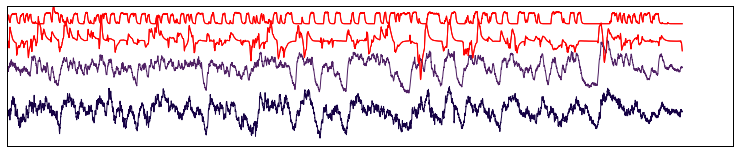

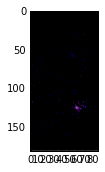

GNG
14
GNG
AMMC_L
74
GNG
79
GNG
111
GNG
112
EPA_R
GNG
184
GNG
200
SAD
FLA_R
GNG
PRW
267
CAN_R
GNG
278
GNG
420
SAD
FLA_R
GNG
564
SAD
GOR_R
GNG
GOR_L
648
adult gnathal ganglion


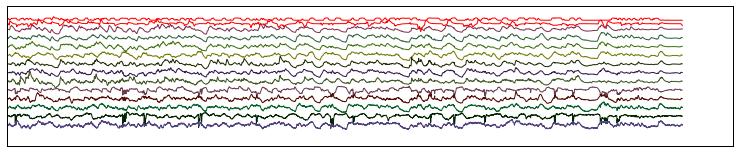

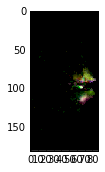

IVLP_R
PRW
9
FLA_R
PRW
95
PRW
345
PRW
388
PRW
CAN_L
FLA_L
429
prow


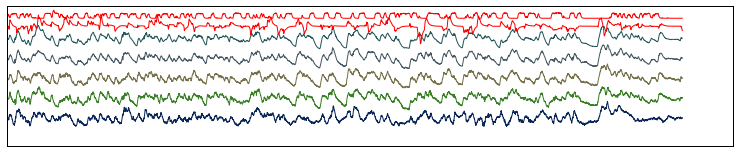

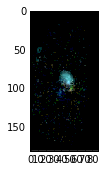

GA_R
71
SIP_R
GA_R
EPA_L
302
LH_R
AL_R
MB_CA_R
GA_R
446
GA_R
AME_L
BU_L
MB_PED_L
569
FLA_R
IPS_R
GA_R
SIP_L
640
GNG
GA_R
BU_L
680
GA_R
AME_L
694
GA_R
AME_L
716
IB_R
GA_R
AMMC_L
772
GA_R
FLA_L
794
GA_R
IB_L
AVLP_L
797
gall


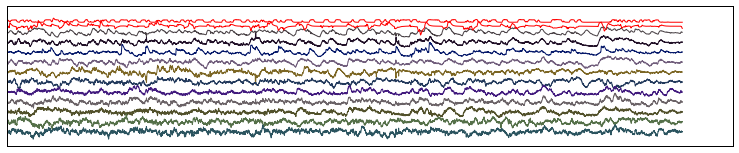

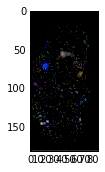

EPA_R
AME_L
GOR_L
201
AME_L
LO_L
LOP_L
ME_L
240
AME_L
284
AME_L
422
AME_L
BU_L
423
AME_L
430
EPA_R
AME_L
CRE_L
MB_ML_L
471
CAN_R
GOR_R
AME_L
CAN_L
474
EPA_R
AME_L
CAN_L
485
AME_L
BU_L
506
NO
AME_L
AVLP_L
511
AME_L
537
LO_R
LOP_R
AME_L
CAN_L
550
CAN_R
FLA_R
AME_L
CAN_L
591
VES_R
AME_L
FLA_L
622
AME_L
665
LOP_R
AME_L
726
GOR_R
AME_L
770
accessory medulla


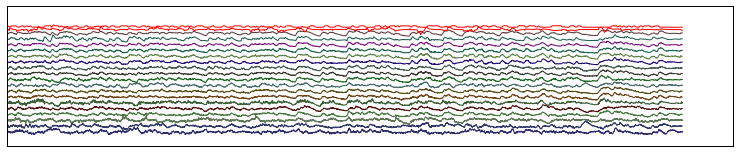

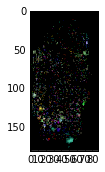

LO_L
LOP_L
26
LO_L
32
LO_L
PVLP_L
PLP_L
49
LO_L
61
LO_L
LOP_L
93
AME_L
LO_L
PVLP_L
104
LO_L
133
LO_L
PLP_L
139
LO_L
LOP_L
147
LO_R
LO_L
ME_L
234
LO_L
ME_L
259
LO_L
LOP_L
353
lobula


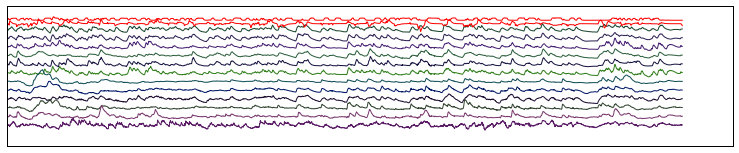

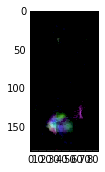

AME_L
BU_L
205
GNG
BU_L
GOR_L
213
GNG
BU_L
314
BU_R
BU_L
336
BU_L
EPA_L
457
GOR_R
PRW
BU_L
GOR_L
470
BU_L
672
EPA_R
BU_L
696
NO
EPA_R
BU_L
CAN_L
727
BU_L
CAN_L
775
BU_L
788
bulb


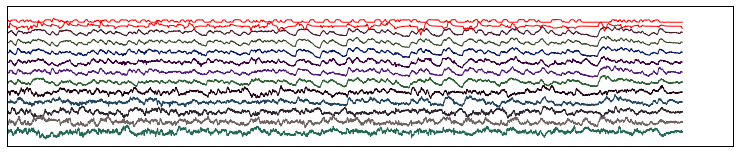

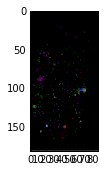

LH_L
318
LH_L
PLP_L
407
LH_L
MB_PED_L
MB_CA_L
559
lateral horn


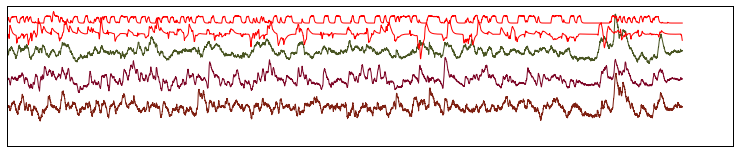

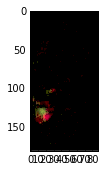

CAN_R
CAN_L
SPS_L
86
CAN_L
144
CAN_L
258
CAN_L
AVLP_L
298
FLA_R
ME_R
CAN_L
416
CAN_L
702
CAN_L
705
AME_R
GOR_R
CAN_L
778
cantle


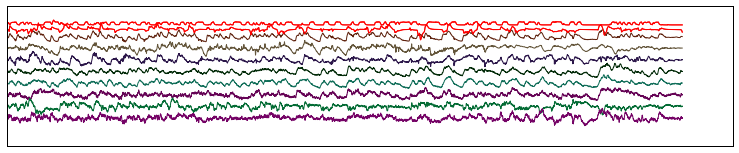

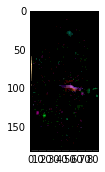

SAD
AMMC_L
12
antennal mechanosensory and motor center


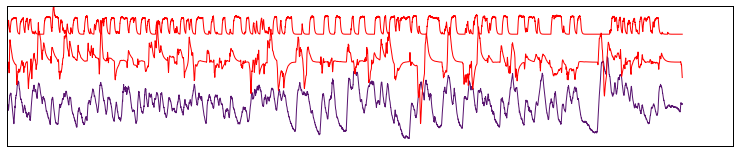

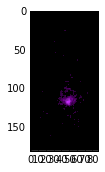

VES_L
AL_L
40
vest


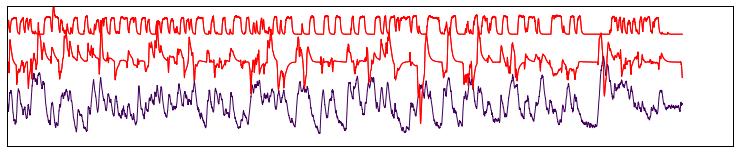

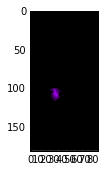

IB_R
IB_L
2
IB_R
IB_L
SPS_L
11
IB_R
IB_L
56
inferior bridge


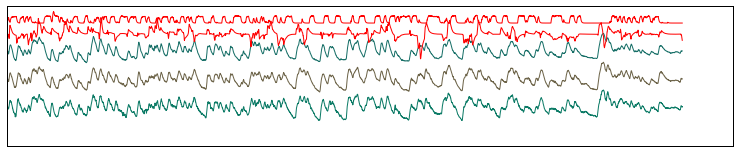

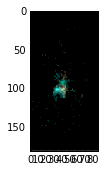

FB
ATL_L
231
antler


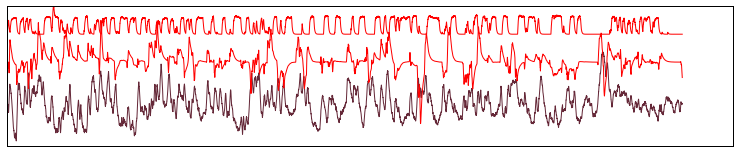

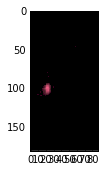

CRE_L
522
CAN_R
BU_L
CRE_L
614
crepine


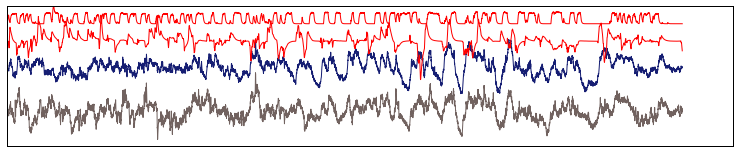

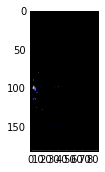

MB_VL_L
SIP_L
106
MB_VL_L
SIP_L
158
vertical lobe of adult mushroom body


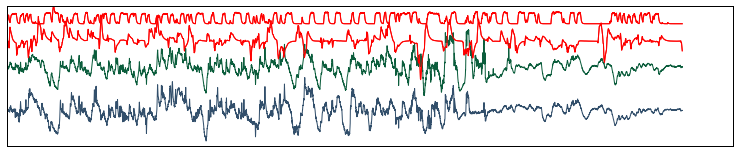

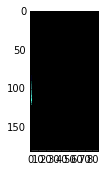

CRE_L
MB_VL_L
MB_ML_L
SMP_L
540
medial lobe of adult mushroom body


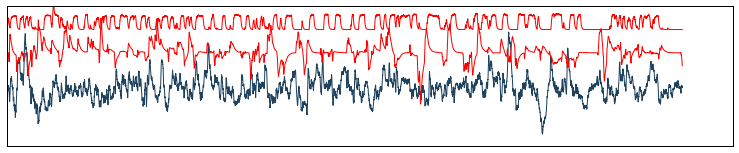

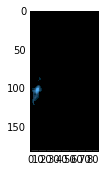

PRW
FLA_L
92
SAD
FLA_L
245
FLA_L
489
flange


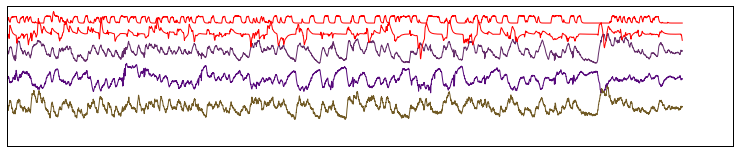

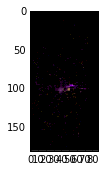

LO_L
LOP_L
31
LOP_L
42
LOP_L
43
LO_L
LOP_L
66
LOP_L
68
LO_L
LOP_L
87
LOP_L
ME_L
88
LOP_L
94
LOP_L
98
LO_L
LOP_L
ME_L
118
LOP_L
119
LOP_L
123
LOP_L
132
LOP_L
ME_L
137
LOP_L
180
LO_L
LOP_L
ME_L
194
LO_L
LOP_L
195
LO_L
LOP_L
244
LO_L
LOP_L
277
LOP_L
282
LO_L
LOP_L
316
LOP_L
323
LO_L
LOP_L
ME_L
360
LOP_L
ME_L
549
lobula plate


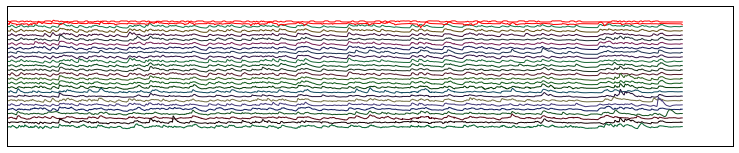

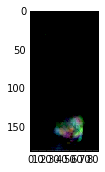

LAL_L
AL_L
8
LAL_L
ICL_L
CRE_L
AL_L
747
adult antennal lobe


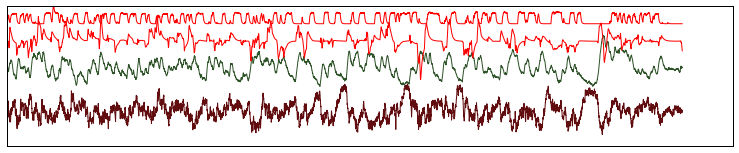

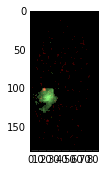

AME_L
LOP_L
ME_L
7
LO_L
LOP_L
ME_L
SCL_L
17
LOP_L
ME_L
20
ME_L
23
LOP_L
ME_L
27
LOP_L
ME_L
59
LO_L
MB_PED_L
LOP_L
ME_L
60
CAN_R
ME_L
67
LOP_L
ME_L
69
ME_L
72
ME_L
96
ME_L
103
ME_L
107
ME_L
125
LOP_L
ME_L
127
ME_L
129
ME_L
134
LOP_L
ME_L
143
AME_R
ME_L
157
LOP_L
ME_L
179
ME_L
190
LOP_L
ME_L
227
LO_R
ME_R
LO_L
ME_L
230
ME_L
255
LOP_L
ME_L
265
LO_L
LOP_L
ME_L
274
LO_L
ME_L
IPS_L
286
ME_L
288
ME_L
290
ME_L
325
ME_L
346
LOP_L
ME_L
348
LOP_L
ME_L
369
ME_L
381
ME_L
385
ME_L
394
ME_L
434
LOP_L
ME_L
469
IB_R
GOR_R
ME_L
499
BU_L
ME_L
509
ME_L
595
MB_PED_R
AOTU_R
ME_L
EPA_L
624
LOP_L
ME_L
669
medulla


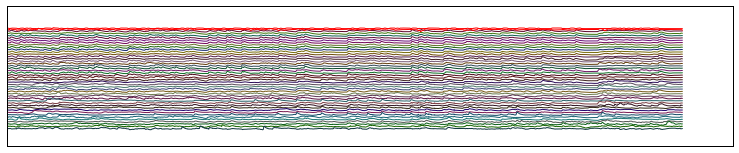

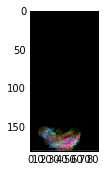

LH_L
SLP_L
MB_CA_L
480
LH_L
MB_VL_L
SLP_L
678
superior lateral protocerebrum


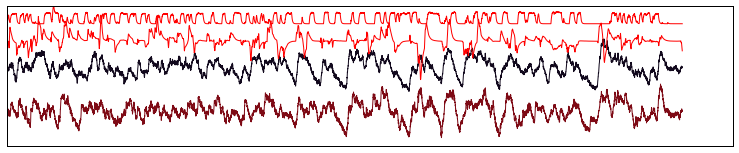

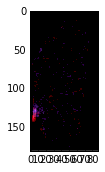

SMP_L
235
ATL_R
SLP_L
SMP_L
334
superior medial protocerebrum


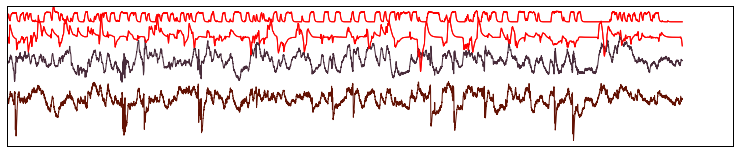

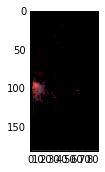

AVLP_L
122
AVLP_L
PVLP_L
155
EPA_R
LO_L
AVLP_L
212
AVLP_L
294
anterior ventrolateral protocerebrum


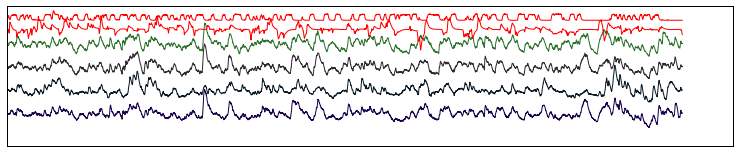

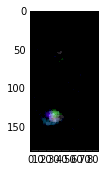

AVLP_R
AVLP_L
PVLP_L
113
LH_L
AVLP_L
PVLP_L
PLP_L
187
posterior ventrolateral protocerebrum


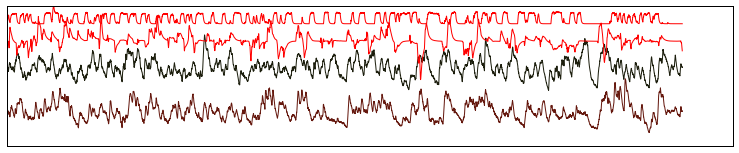

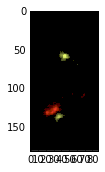

SAD
AMMC_L
IVLP_L
22
LO_L
IVLP_L
PLP_L
262
wedge


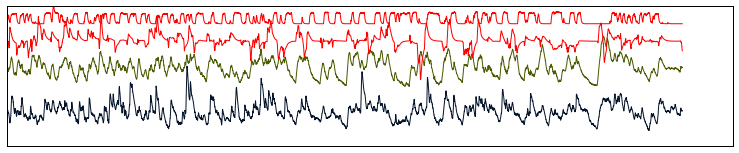

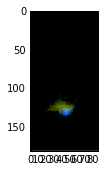

LH_L
PLP_L
121
PLP_L
301
LH_L
PVLP_L
PLP_L
330
posterior lateral protocerebrum


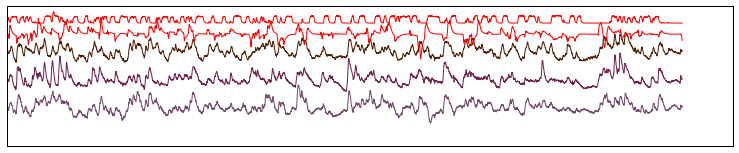

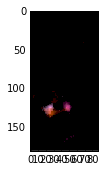

MB_VL_L
SLP_L
SIP_L
AOTU_L
21
SLP_L
PVLP_L
AOTU_L
218
AOTU_L
585
AOTU_L
674
anterior optic tubercle


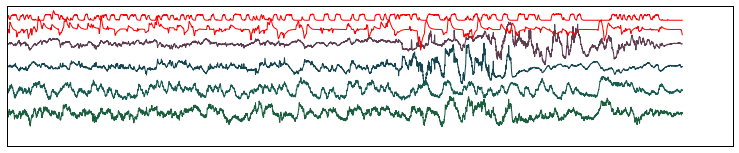

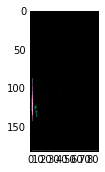

LO_L
GOR_L
MB_CA_L
EPA_L
141
gorget


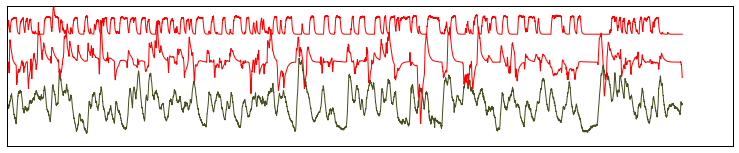

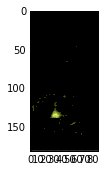

PLP_L
MB_CA_L
116
calyx of adult mushroom body


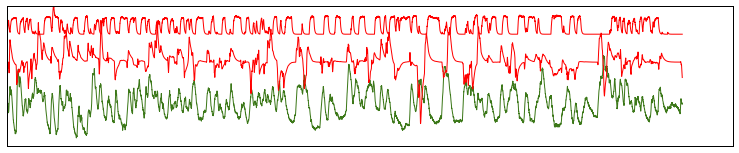

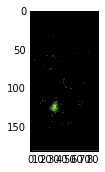

PLP_L
SPS_L
10
AME_L
CAN_L
FLA_L
SPS_L
15
SPS_L
IPS_L
18
IB_R
GOR_R
SPS_R
SPS_L
52
superior posterior slope


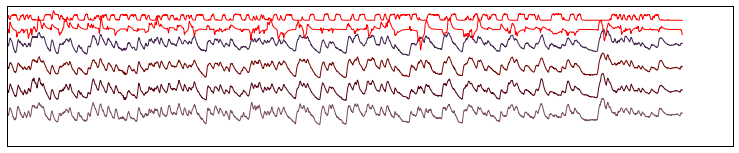

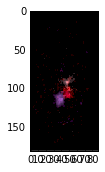

IPS_L
1
IVLP_L
IPS_L
6
GNG
VES_L
IPS_L
37
IPS_L
44
inferior posterior slope


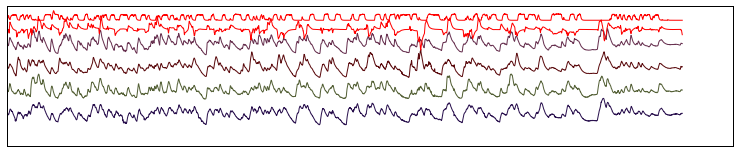

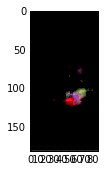

FLA_R
EPA_L
185
GNG
AOTU_L
EPA_L
433
epaulette


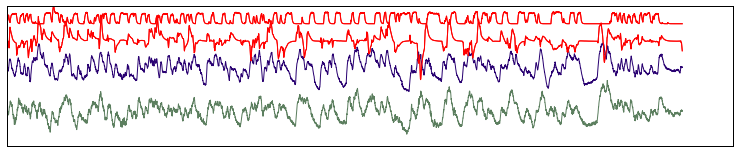

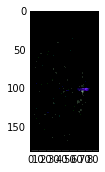

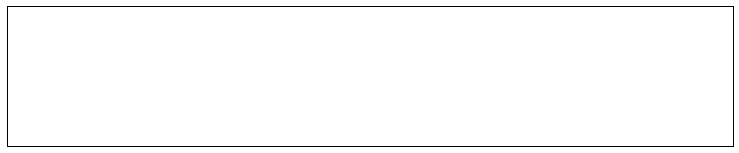

In [28]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)        
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
    plt.plot(Time_fluoICA.T,3*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
    plt.plot(Time_fluoICA.T,2*Xk[:,4]/np.max(Xk[:,4])+2,color=(1,0,0))
    #plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
# Open template

In [30]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie2/981/981Final/AVG_981ss2onc500regcpsf.nii


(181, 88, 9)

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [31]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [32]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [33]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [34]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [35]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [36]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [37]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [38]:
NewOrder=np.argsort(SmallRegion)

# Last pruning by hand

In [40]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [41]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


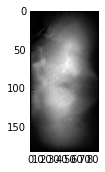

In [42]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [43]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [44]:
algorithm = linear_model.LinearRegression()

In [61]:
Sxk=Xk.shape

In [62]:
clear X

In [63]:
X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])

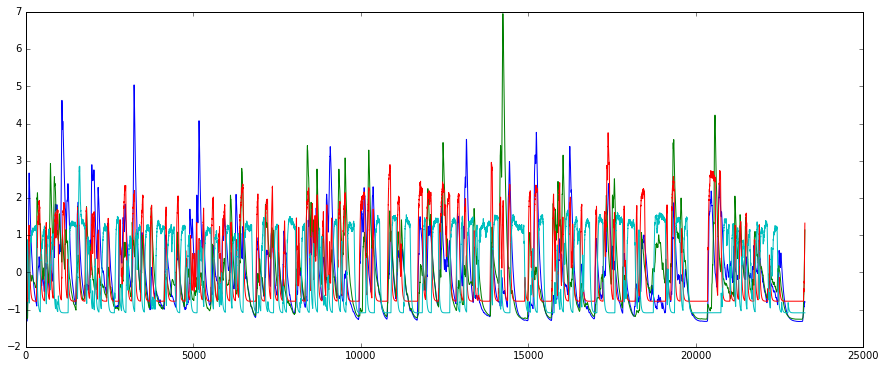

In [110]:
plt.plot(X[:,0])
plt.plot(X[:,1])
plt.plot(X[:,2])
plt.plot(X[:,3])

In [279]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    if (CompMainName[j] != '') and (LargerRegionI[j]!=1) and (LargerRegionI[j]==1 or LargerRegionI[j]==1
                                                             
                                                             
                                                             ):
        print(j)
        print(CompMainName[j])
        for i in range(Nstack):
            plt.subplot(1,5,i+1)
            plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
            plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
        
        plt.show()
        
        model = algorithm.fit(X, DT[:,j])
        betas = model.coef_
        rsq = model.score(X,DT[:,j])
        print('left:',betas[0],'right:',betas[1],'walk:',betas[2],'groom:',betas[3])
        print(rsq)
        plt.plot(Time_fluoICA.T,2*DT[:,j]+1.5)
        plt.plot(Time_fluoICA.T,2*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
        plt.plot(Time_fluoICA.T,Xk[:,4]/np.max(Xk[:,4])+4,color=(1,0,0))
        plt.show()
        a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [280]:
Dmaps.shape

(181, 88, 9, 799)

In [70]:
fn=open('/home/sophie/Desktop/981GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [146]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [147]:
G=Good_ICs.tolist();

In [148]:
len(Good_ICs)

300

In [149]:
G.count(1)

151

# Plot all components for turning left, right, walking, and grooming

In [81]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((4,S[3]))

In [82]:
for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

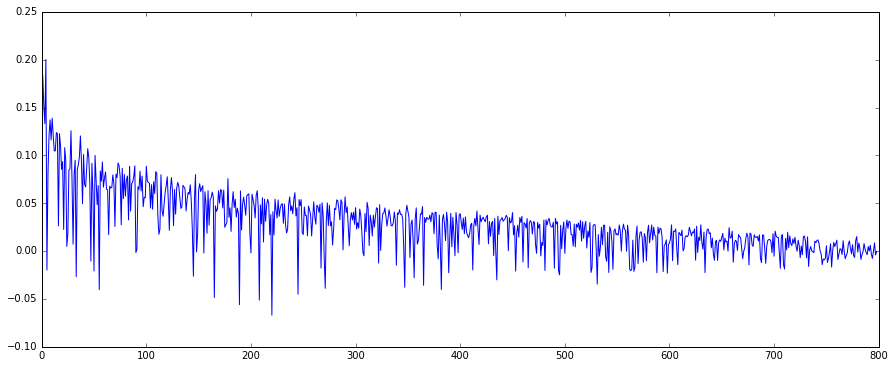

In [88]:
plt.plot(Betas[0,:])

In [299]:
del Final_map
del Fmaps

In [300]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [301]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [302]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if Betas[0,j]>0.14:
    #if 1>0.1:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.8*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

In [303]:
np.max(np.max(np.max(Final_map)))

0.80000000000000016

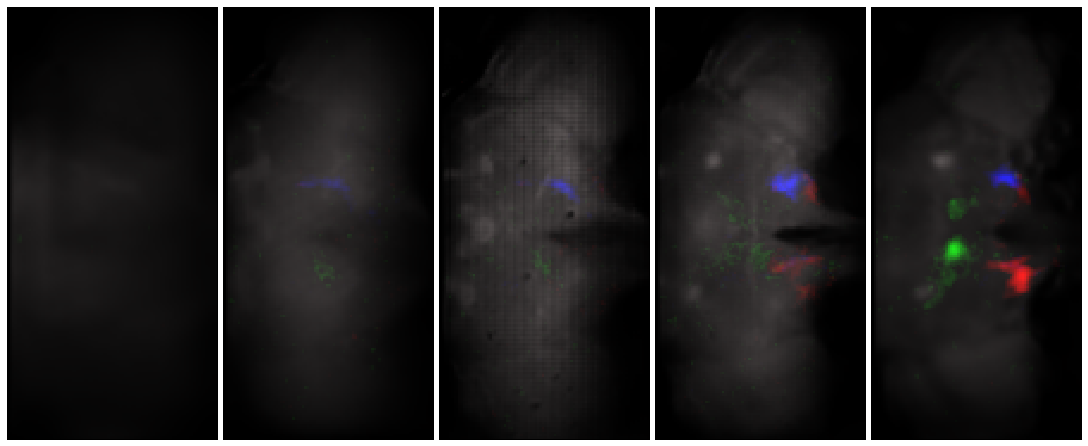

In [304]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

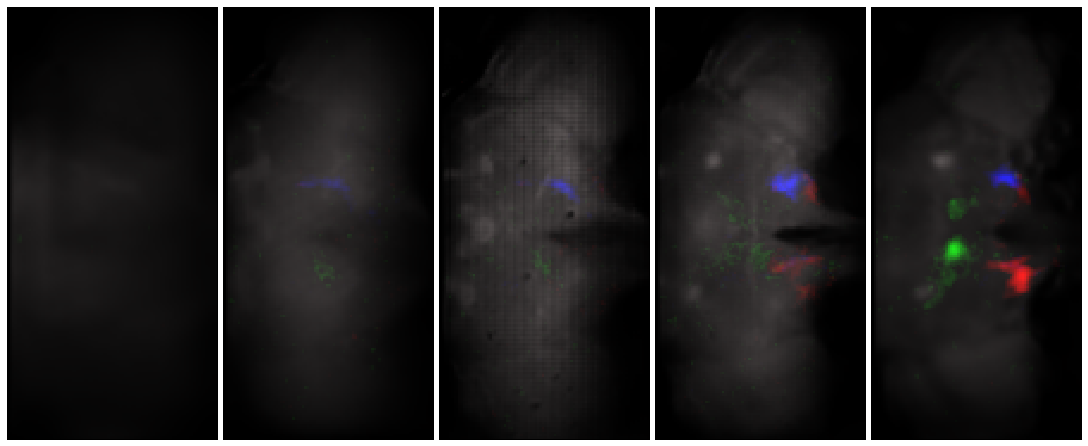

In [305]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

# Plot all components together

In [71]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [72]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [73]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [74]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

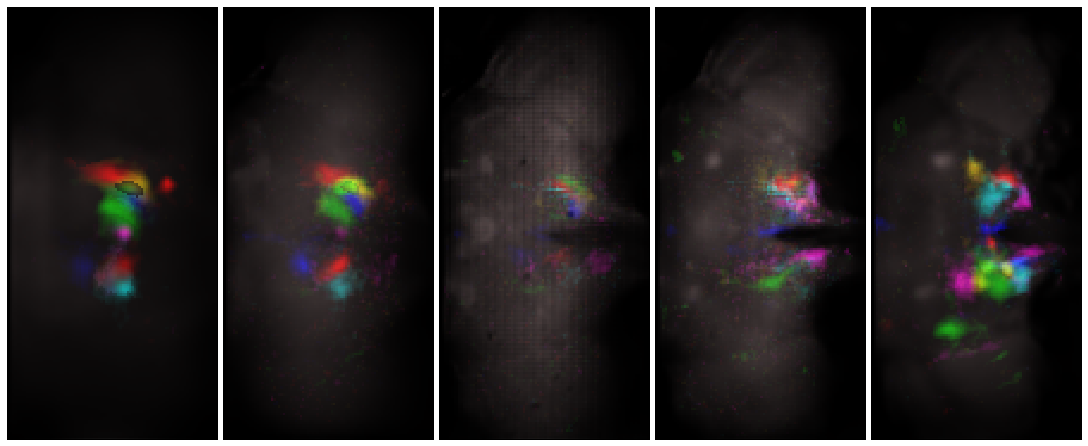

In [75]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

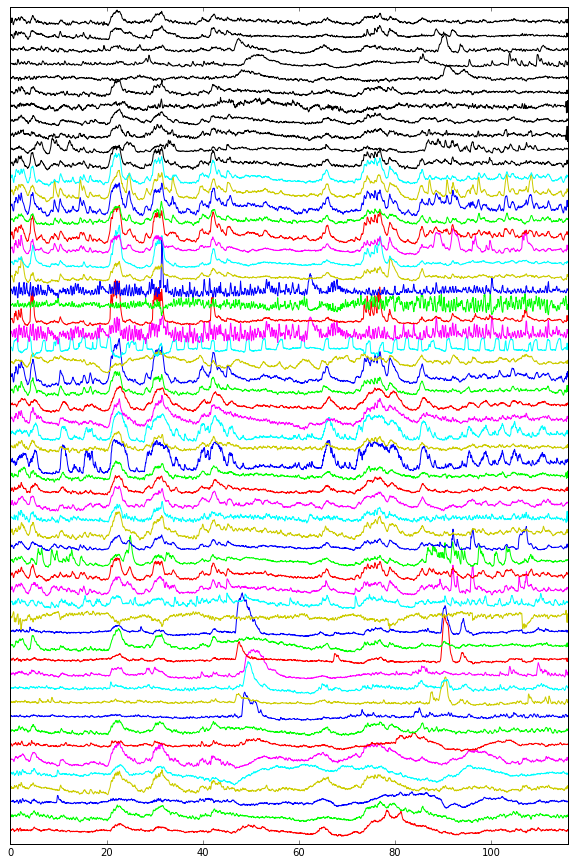

In [123]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [124]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['ME_L']
1
['ME_L']
2
['ME_L']
3
['ME_L']
4
['ME_L']
5
['ME_L']
6
['ME_R']
7
['ME_R']
8
['LO_R']
9
['LO_R']
10
['LO_R']
11
['LO_R']
12
['LO_L']
13
['LO_L']
14
['LO_L']
15
['LOP_L']
16
['AVLP_R']
17
['AVLP_L']
18
['IVLP_R']
19
['IVLP_R']
20
['IVLP_L']
21
['AL_L']
22
['MB_VL_R']
23
['SMP_R']
24
['EB']
25
['PB']
26
['PB']
27
['PB']
28
['PB']
29
['PB']
30
['PB']
31
['SPS_R']
32
['SPS_L']
33
['IPS_R']
34
['IPS_R']
35
['IPS_R']
36
['IPS_R']
37
['IPS_R']
38
['IPS_R']
39
['IPS_R']
40
['IPS_L']
41
['IPS_L']
42
['SAD']
43
['FLA_L']
44
['PRW']
45
['PRW']
46
['PRW']
47
['GNG']
48
['']
49
['']
50
['']
51
['']
52
['']
53
['']
54
['']
55
['']
56
['']
57
['']


In [125]:
Sets=[range(10),range(10,12),range(12,17),range(17,20),20,range(21,23),range(23,25),25]

In [126]:
pylab.rcParams['figure.figsize'] = (12, 6)

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
                
    Df=np.zeros([S[0],S[1],3]) 
  
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/16
    MM=np.max(np.max(Df))

    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
                                

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: total size of new array must be unchanged